<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Predicting_Heart_Disease_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv('/content/drive/MyDrive/BTT Personal Project (Group 14)/heart_2020_cleaned.csv')
df   

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
# Check for nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **Visualizations & EDA**

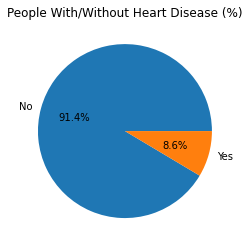

In [19]:
# Percentage of People with/without Heart Disease
fig, ax = plt.subplots(1, 1,figsize =(8, 4))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.1f%%',labels=['No',"Yes"])
ax.set_title('People With/Without Heart Disease (%)')
fig.show()

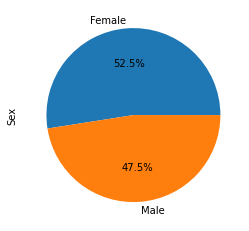

In [18]:
# Sex of People in Dataset
df.Sex.value_counts().plot(kind='pie',autopct='%1.1f%%');

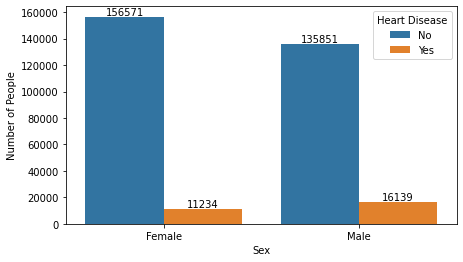

In [ ]:
# Sex: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')
ax.set(xlabel='Sex', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Age Categories of People in Dataset
df1 = df.groupby(["AgeCategory"]).count().reset_index()

fig1 = px.bar(df1,
             y=df.groupby(["AgeCategory"]).size(),
             x="AgeCategory",
             color='AgeCategory')
fig1.show()

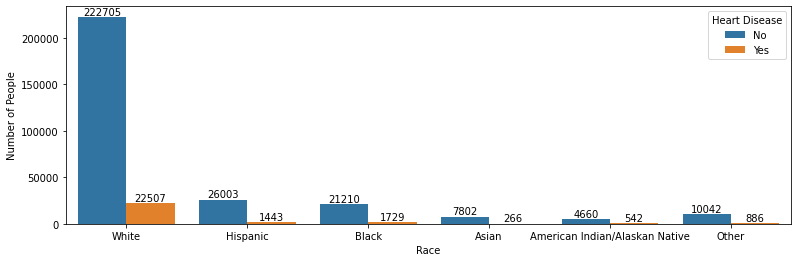

In [ ]:
# Race: People with Heart Disease
plt.figure(figsize=(13, 4))
ax = sns.countplot(data=df, x='Race', hue='HeartDisease', order=['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'])
ax.set(xlabel='Race', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

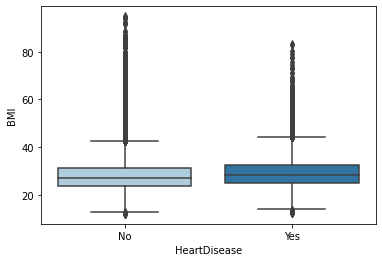

In [ ]:
# BMI by Heart Disease
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=df) #from the original dataset 
plt.show()

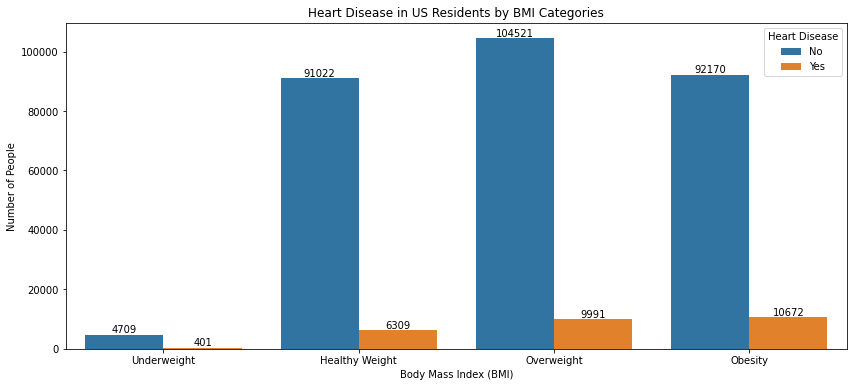

In [3]:
# BMI (Categorized Barplot): People with Heart Disease

# Creating new column BMIGroup for BMI Categories
df.loc[df['BMI']<18.5, 'BMIGroup'] = 'Underweight'
df.loc[df['BMI'].between(18.5,25,inclusive='left'), 'BMIGroup'] = 'Healthy Weight'
df.loc[df['BMI'].between(25,30,inclusive='left'), 'BMIGroup'] = 'Overweight'
df.loc[df['BMI']>=30, 'BMIGroup'] = 'Obesity'

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='BMIGroup', hue='HeartDisease')
ax.set(xlabel='Body Mass Index (BMI)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by BMI Categories')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

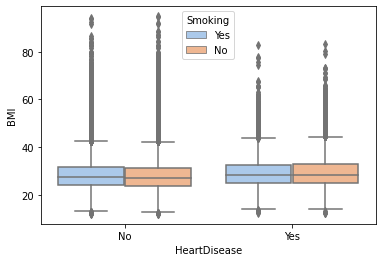

In [ ]:
# BMI and Smoking by Heart Disease
sns.set_palette("pastel")
ax = sns.boxplot(x="HeartDisease", y = "BMI", hue = "Smoking", data=df)
plt.show()

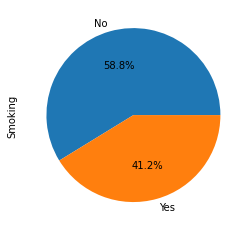

In [20]:
# People who have Smoked at least 100 Cigaretes 
df.Smoking.value_counts().plot(kind='pie',autopct='%1.1f%%');

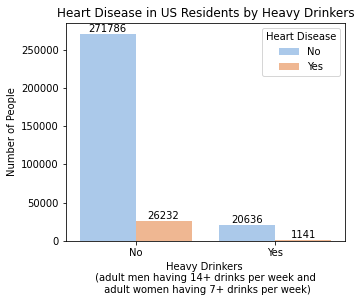

In [ ]:
# Heavy vs Nonheavy drinkers: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')
ax.set(xlabel='Heavy Drinkers \n (adult men having 14+ drinks per week and \n adult women having 7+ drinks per week)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Heavy Drinkers')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

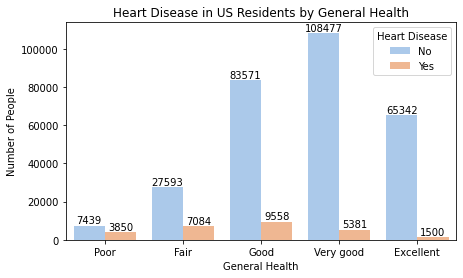

In [ ]:
# General Health: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
ax.set(xlabel='General Health', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by General Health')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

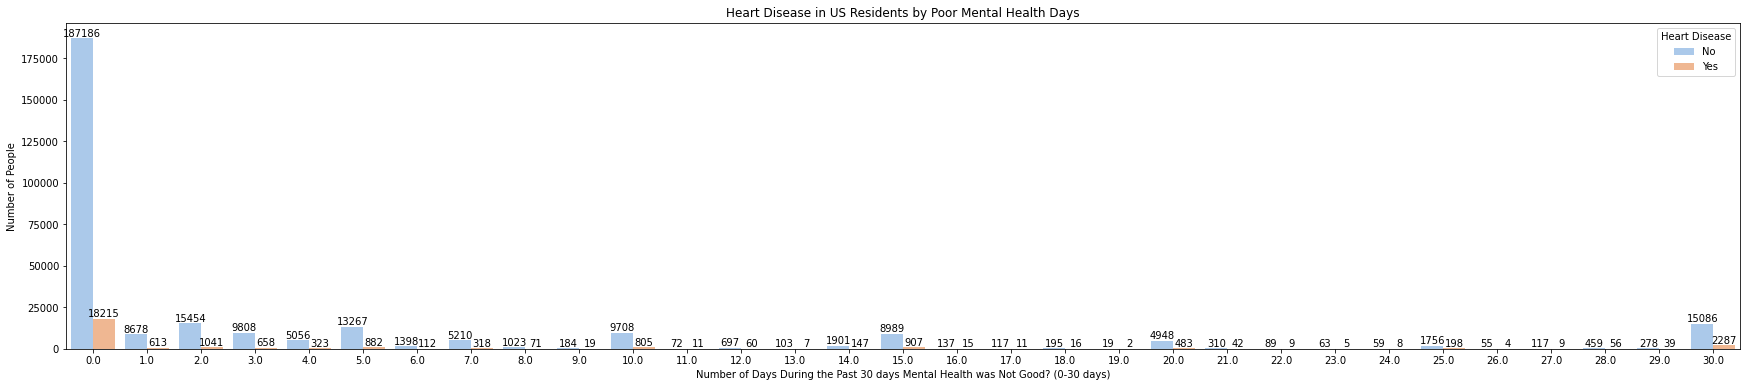

In [ ]:
# Mental Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='MentalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Mental Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Poor Mental Health Days')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

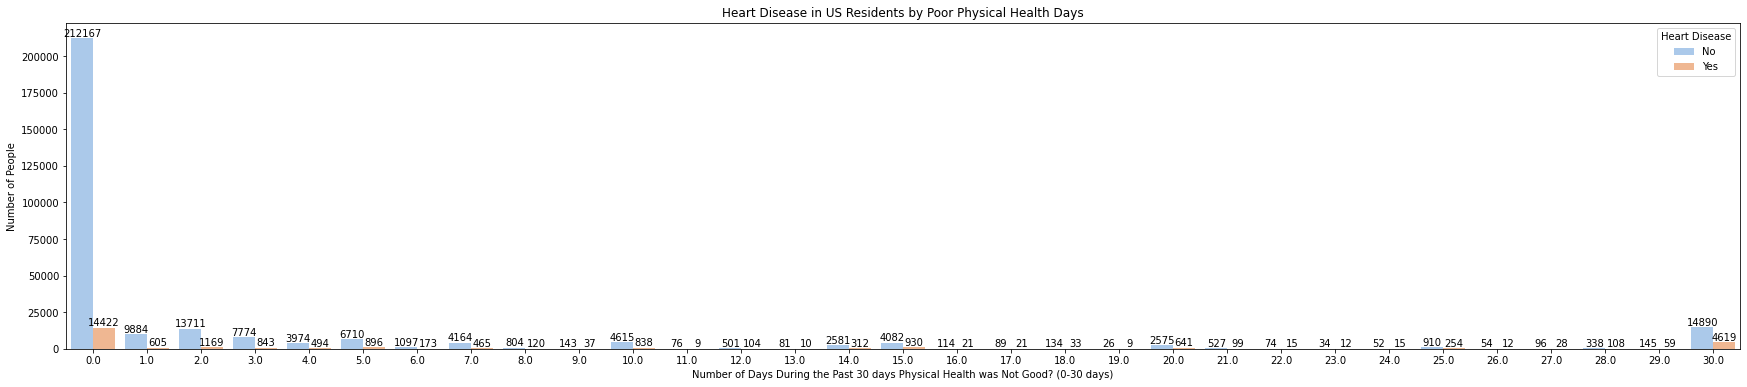

In [ ]:
# Physical Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='PhysicalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Physical Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Poor Physical Health Days')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

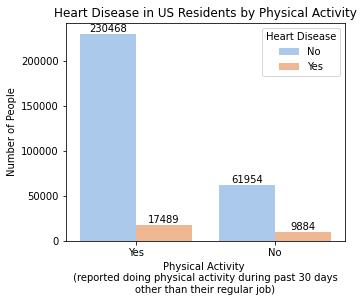

In [ ]:
# Physical Activity: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
ax.set(xlabel='Physical Activity \n (reported doing physical activity during past 30 days \nother than their regular job)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Physical Activity')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

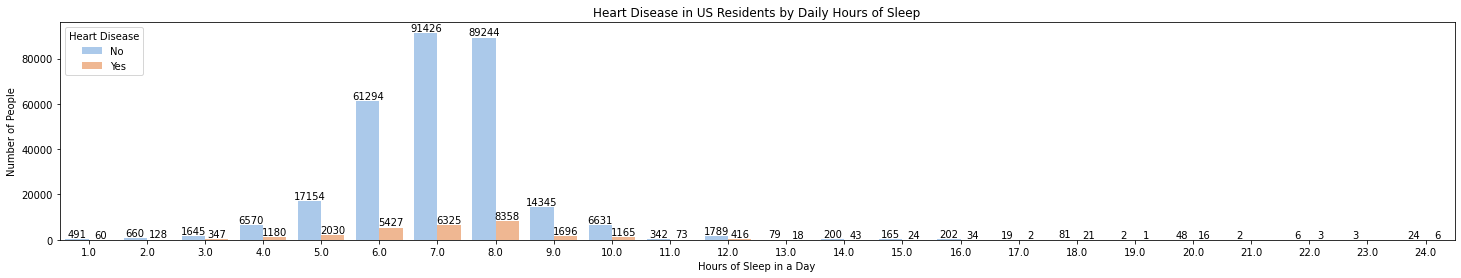

In [ ]:
# Sleep Time: People with Heart Disease
plt.figure(figsize=(25, 4))
ax = sns.countplot(data=df, x='SleepTime', hue='HeartDisease')
ax.set(xlabel='Hours of Sleep in a Day', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Daily Hours of Sleep')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

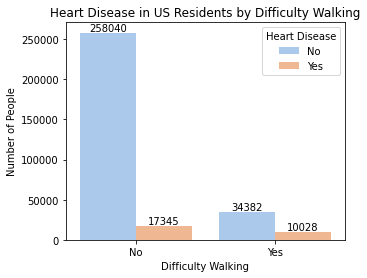

In [ ]:
# Difficulty Walking: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')
ax.set(xlabel='Difficulty Walking', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Difficulty Walking')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

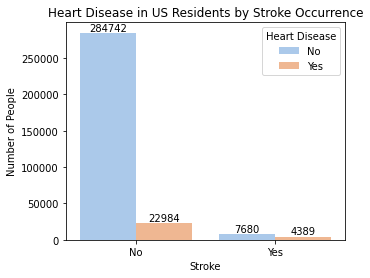

In [ ]:
# Stroke: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Stroke', hue='HeartDisease')
ax.set(xlabel='Stroke', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Stroke Occurrence')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

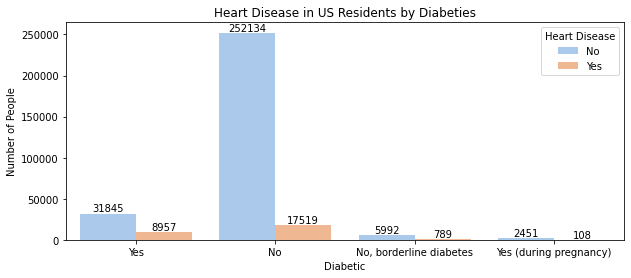

In [ ]:
# Diabetic: People with Heart Disease
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Diabetic', hue='HeartDisease')
ax.set(xlabel='Diabetic', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Diabeties')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

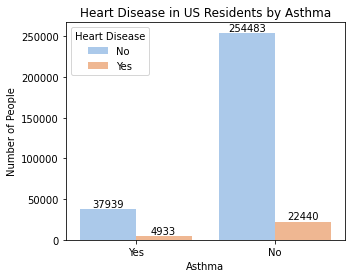

In [ ]:
# Asthma: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Asthma', hue='HeartDisease')
ax.set(xlabel='Asthma', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Asthma')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

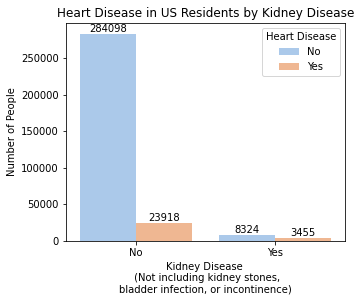

In [ ]:
# Kidney Disease: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')
ax.set(xlabel='Kidney Disease \n (Not including kidney stones,\nbladder infection, or incontinence)', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Kidney Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

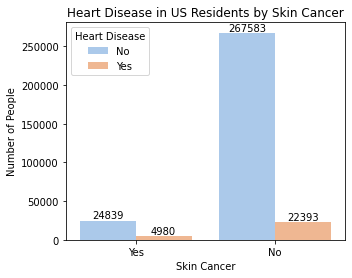

In [ ]:
# Skin Cancer: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
#ax = sns.displot(data=df, x='SkinCancer', hue='HeartDisease', multiple='stack')
ax.set(xlabel='Skin Cancer', ylabel='Number of People')
ax.legend(title='Heart Disease')
ax.set_title('Heart Disease in US Residents by Skin Cancer')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# **Balancing & Splitting Data**

## **Ryan - Oversampling, and 80/20 split for training and testing**

In [4]:
X = df
Y = df['HeartDisease']
from imblearn.over_sampling import RandomOverSampler
randomos = RandomOverSampler(random_state = 0)
oversampledX, oversampledY = randomos.fit_resample(X,Y)
print(oversampledX.shape, oversampledY.shape)
#I think oversampledX is the new dataset with all of it being oversampled

(584844, 19) (584844,)


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

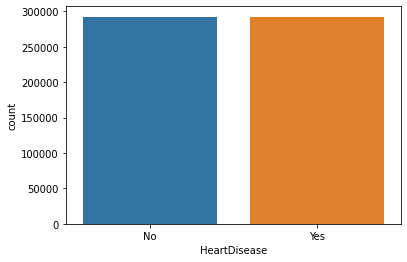

In [5]:
sns.countplot(x=oversampledX['HeartDisease'], data=oversampledY)

In [6]:
oversampled_training_data, oversampled_testing_data = train_test_split(oversampledX, test_size=0.2, random_state=25)
print(f"No. of training examples: {oversampled_training_data.shape[0]}")
print(f"No. of testing examples: {oversampled_testing_data.shape[0]}")

No. of training examples: 467875
No. of testing examples: 116969


## **Hannah and Sukriti - Undersampling and 80/20 split for training and testing**

In [7]:
# Use Random Undersampler
from imblearn.under_sampling import RandomUnderSampler

# Set the variables
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

# Amount of data prior to undersampling
print("Before undersampling: ", Counter(df['HeartDisease']))

# Apply the undersampler
undersample = RandomUnderSampler(sampling_strategy= 'majority')
X_rs, y_rs = undersample.fit_resample(X, y)

# Amount of data post undersampling
print("After undersampling:",Counter(y_rs))

# New dataset that is correctly undersampled
undersampled_df = X_rs
undersampled_df.insert(0, 'HeartDisease', y_rs)

Before undersampling:  Counter({'No': 292422, 'Yes': 27373})
After undersampling: Counter({'No': 27373, 'Yes': 27373})


In [8]:
# Split-out validation dataset using train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
undersampled_training_data, undersampled_testing_data = train_test_split(undersampled_df, test_size=0.2, random_state=25)

# Show the number of items per set
print(f"No. of training examples: {undersampled_training_data.shape[0]}")
print(f"No. of testing examples: {undersampled_testing_data.shape[0]}")

No. of training examples: 43796
No. of testing examples: 10950


## **Sophie - Encoding, SMOTE, and 80/20 Split**

In [9]:
# Make a copy of the data for encoding
df_encoded = df.copy()

In [10]:
# Encode categorical columns with 2 values (e.g. Yes/No)

le = preprocessing.LabelEncoder()
encoding_lst = []
binary_cols = [col for col in df_encoded.columns if df_encoded[col].dtype not in [int, float]
               and df_encoded[col].nunique() == 2]

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_lst.append([col, le_mapping])

# Printing the encoding mapping for reference
for row in encoding_lst:
    print(*row)
    
df_encoded.head()

HeartDisease {'No': 0, 'Yes': 1}
Smoking {'No': 0, 'Yes': 1}
AlcoholDrinking {'No': 0, 'Yes': 1}
Stroke {'No': 0, 'Yes': 1}
DiffWalking {'No': 0, 'Yes': 1}
Sex {'Female': 0, 'Male': 1}
PhysicalActivity {'No': 0, 'Yes': 1}
Asthma {'No': 0, 'Yes': 1}
KidneyDisease {'No': 0, 'Yes': 1}
SkinCancer {'No': 0, 'Yes': 1}


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,Underweight
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,Healthy Weight
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,Healthy Weight
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,Healthy Weight


In [11]:
# Encoding categorical columns with more than 2 values

ageCategory = {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].replace(ageCategory)

race = {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'White': 4, 'Other': 5}
df_encoded['Race'] = df_encoded['Race'].replace(race)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df_encoded['Diabetic'] = df_encoded['Diabetic'].replace(diabetic)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df_encoded['GenHealth'] = df_encoded['GenHealth'].replace(genHealth)

bmiGroup = {'Underweight':0, 'Healthy Weight':1, 'Overweight':2, 'Obesity':3}
df_encoded['BMIGroup'] = df_encoded['BMIGroup'].replace(bmiGroup)

df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,3,1,3,5.0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,3,7.0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,3,1,1,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,3,8.0,0,0,0,1


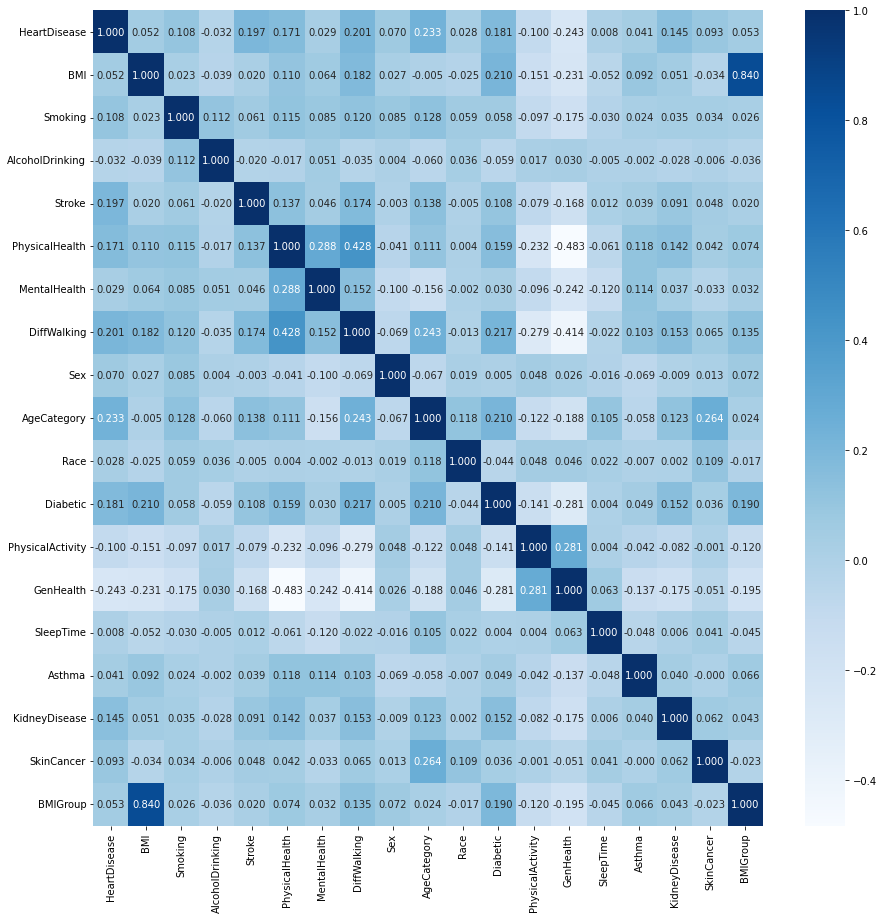

In [12]:
# Correlation Matrix
plt.figure(figsize=(15,15))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3f')
plt.show()

In [13]:
X = df_encoded.drop('HeartDisease',axis=1)
Y = df_encoded['HeartDisease']

In [14]:
# Split original dataset into 80 training, 20 testing 
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, Y, test_size=0.2, random_state=2023)

In [16]:
from imblearn.over_sampling import SMOTE
resample = SMOTE(random_state = 52)
X_train_SMOTE, y_train_SMOTE = resample.fit_resample(X_train_SMOTE, y_train_SMOTE)
X_train_SMOTE.info()
y_train_SMOTE.value_counts() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467984 entries, 0 to 467983
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               467984 non-null  float64
 1   Smoking           467984 non-null  int64  
 2   AlcoholDrinking   467984 non-null  int64  
 3   Stroke            467984 non-null  int64  
 4   PhysicalHealth    467984 non-null  float64
 5   MentalHealth      467984 non-null  float64
 6   DiffWalking       467984 non-null  int64  
 7   Sex               467984 non-null  int64  
 8   AgeCategory       467984 non-null  int64  
 9   Race              467984 non-null  int64  
 10  Diabetic          467984 non-null  int64  
 11  PhysicalActivity  467984 non-null  int64  
 12  GenHealth         467984 non-null  int64  
 13  SleepTime         467984 non-null  float64
 14  Asthma            467984 non-null  int64  
 15  KidneyDisease     467984 non-null  int64  
 16  SkinCancer        46

0    233992
1    233992
Name: HeartDisease, dtype: int64